In [43]:
import pandas  as pd
import numpy as np
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Australia Rain Prediction - Classification

The purpose of this project is to determine if it will be raining tomorrow in Australia.  
Our data was imported from kaggle.com and it contains 145460 rows and 23 columns.  
This data covers 49 different location in Australia, presents a daily weather, wind, humdity, pressure, and so on.   
The concluding column is whether it will will be raining tomorrow "Yes" or "No".  
Link to the dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package  

In [2]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.dummy import DummyClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
# from sklearn import metrics
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

### Getting the Data
First we will import the data into the notebook, then we will start working on the data in order to understand the behavior of the data.  
We will try to find some patterns in the data which will allow us to neglect some columns that are irrelevant or that are highly correlated  
with other columns to prevent overfitting. 

In [49]:
weather = pd.read_csv('/Users/netan/PycharmProjects/Introduction_To_Data_Science_Project/Data/weatherAUS.csv')
weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


## Explaning the columns
  * **Date:** The date when this row was taken. Year-Month-Day  
  * **Location:** City/Town of the measurement.
  * **MinTemp/MaxTemp:** The Minimum/Maximum temperature in Celsius measured in that day.
  * **Rainfall:** The amount of rainfall recorded for the day in mm
  * **Evaporation:** The amount of mm that where evaporated in the last 24-hrs (liquids transofrming into gas).
  * **Sunshine:** Bright sunshine hours in the 24 hours to midnight.
  * **WindGustDir:** Direction of strongest gust in the 24 hours to midnight (the unit is 16 compass points).
  * **WindGustSpeed:** Speed of strongest wind gust in the 24 hours to midnight in KPH (kilometres per hour).
  * **WindDir9am/WindDir3pm:** Wind direction averaged over 10 minutes prior to 9-AM/3-PM.
  * **WindSpeed9am/WindSpeed3pm:** Wind speed averaged over 10 minutes prior to 9-AM/3-PM.
  * **Humidity9am/Humidity3pm:** Relative humidity at 9-AM/3-PM.
  * **Pressure9am/Pressure3pm:** Atmospheric pressure reduced to mean sea level at 9-AM/3-PM.
  * **Cloud9am/Cloud3pm:** Fraction of sky obscured by cloud at 9-AM/3-PM (number between 0-8, 0 indicates clear sky 8 indicates cloudy sky).
  * **Temp9am/Temp3pm:** Temperature in Celsius at 9-AM/3-PM.
  * **RainToday:** Yes if it was rainning today No otherwise.
  * **RainTomorrow:** Yes/No if it will be rainning tomorrow - ***this is the target column***.  
  
  
  

## Data cleaning:
Before cleaning the data we need to know and udnerstand the data better.
Then we will start working on the data by the following steps:


In [48]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**We will check how many unique and nulls values the Object type columns contains:**

In [65]:
object_cols = [var for var in weather.columns if weather[var].dtype=='O']
object_nulls = weather[object_cols].isnull().sum()

for var in object_cols:
    print('{} contains:\n  {} unique values.\n  {} null values.\n'.format(var, len(weather[var].unique()), object_nulls[var]))

Date contains:
  3436 unique values.
  0 null values.

Location contains:
  49 unique values.
  0 null values.

WindGustDir contains:
  17 unique values.
  10326 null values.

WindDir9am contains:
  17 unique values.
  10566 null values.

WindDir3pm contains:
  17 unique values.
  4228 null values.

RainToday contains:
  3 unique values.
  3261 null values.

RainTomorrow contains:
  3 unique values.
  3267 null values.



**Count all the Null values:**

In [77]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**The percentage of the Null values for each column**:

In [78]:
(weather.isnull().sum()/len(weather))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

### Now we can start cleaning the data. 
**First we will convert all the Object type columns into a numeric values or to a binary indicators:**

In [79]:
# No will be count as 0 and yes will be count as 1.
weather['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
weather['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

**Second we will fill out all the empty spots in each column:**  
The Object type columns will be filled with the mode value -> The most frequent value appears in this column.  
The Float type columns will be filled with the mean value ->  Arithmetic mean is the sum of data divided by the number of data-points.

In [81]:
# Object columns
weather['RainToday']=weather['RainToday'].fillna(weather['RainToday'].mode()[0])
weather['RainTomorrow']=weather['RainTomorrow'].fillna(weather['RainTomorrow'].mode()[0])
weather['WindDir9am'] = weather['WindDir9am'].fillna(weather['WindDir9am'].mode()[0])
weather['WindGustDir'] = weather['WindGustDir'].fillna(weather['WindGustDir'].mode()[0])
weather['WindDir3pm'] = weather['WindDir3pm'].fillna(weather['WindDir3pm'].mode()[0])

In [80]:
# Float columns
weather['MinTemp']=weather['MinTemp'].fillna(weather['MinTemp'].mean())
weather['MaxTemp']=weather['MaxTemp'].fillna(weather['MaxTemp'].mean())
weather['Rainfall']=weather['Rainfall'].fillna(weather['Rainfall'].mean())
weather['Evaporation']=weather['Evaporation'].fillna(weather['Evaporation'].mean())
weather['Sunshine']=weather['Sunshine'].fillna(weather['Sunshine'].mean())
weather['WindGustSpeed']=weather['WindGustSpeed'].fillna(weather['WindGustSpeed'].mean())
weather['WindSpeed9am']=weather['WindSpeed9am'].fillna(weather['WindSpeed9am'].mean())
weather['WindSpeed3pm']=weather['WindSpeed3pm'].fillna(weather['WindSpeed3pm'].mean())
weather['Humidity9am']=weather['Humidity9am'].fillna(weather['Humidity9am'].mean())
weather['Humidity3pm']=weather['Humidity3pm'].fillna(weather['Humidity3pm'].mean())
weather['Pressure9am']=weather['Pressure9am'].fillna(weather['Pressure9am'].mean())
weather['Pressure3pm']=weather['Pressure3pm'].fillna(weather['Pressure3pm'].mean())
weather['Cloud9am']=weather['Cloud9am'].fillna(weather['Cloud9am'].mean())
weather['Cloud3pm']=weather['Cloud3pm'].fillna(weather['Cloud3pm'].mean())
weather['Temp9am']=weather['Temp9am'].fillna(weather['Temp9am'].mean())
weather['Temp3pm']=weather['Temp3pm'].fillna(weather['Temp3pm'].mean())


**Final check to see that we filled all the empty blocks.**

In [87]:
weather.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

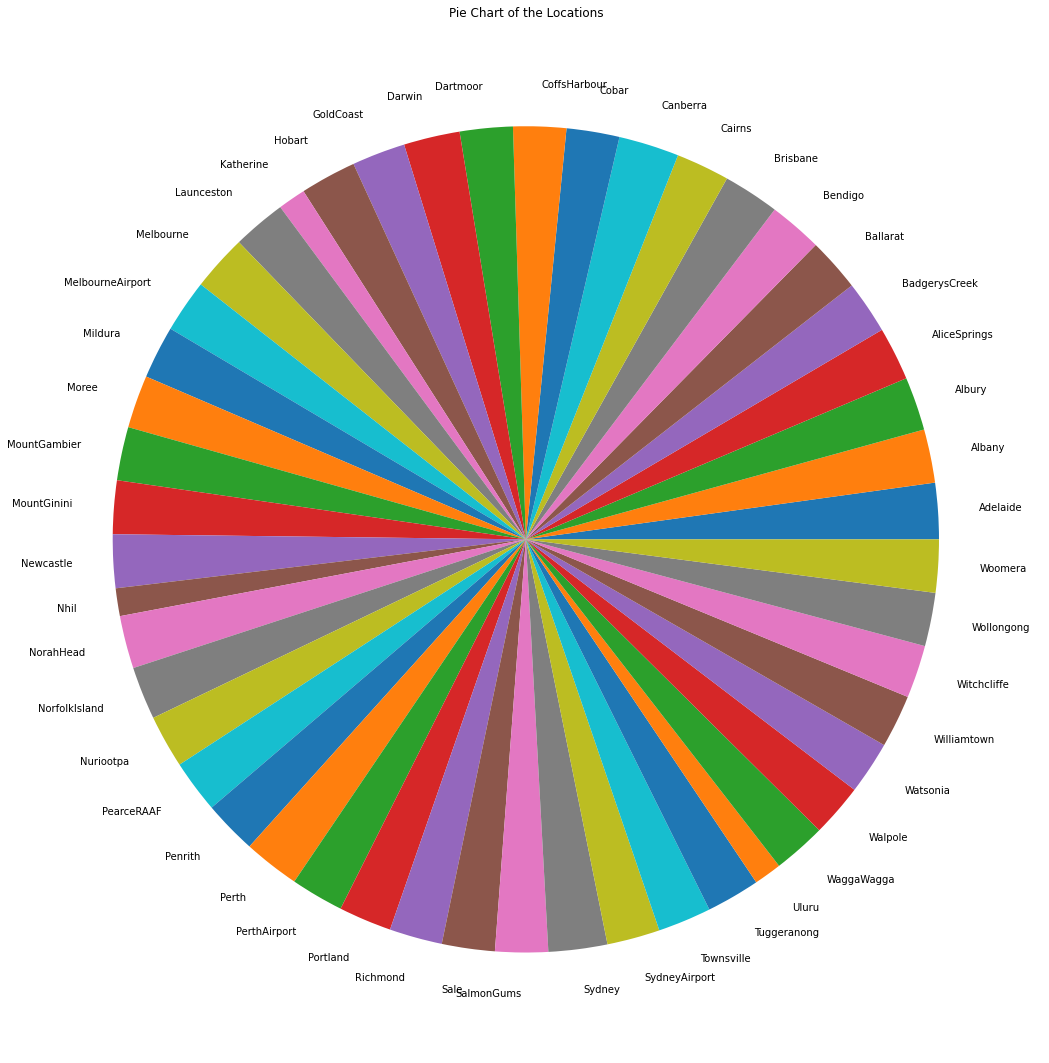

In [117]:
locations = weather.groupby('Location').size()
locations.plot(kind='pie', subplots=True, figsize=(19, 19))
plt.title("Pie Chart of the Locations")
plt.ylabel("")
plt.show()

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>],
       [<AxesSubplot:title={'center':'RainToday'}>,
        <AxesSubplot:title={'center':'RainTomorrow'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=o

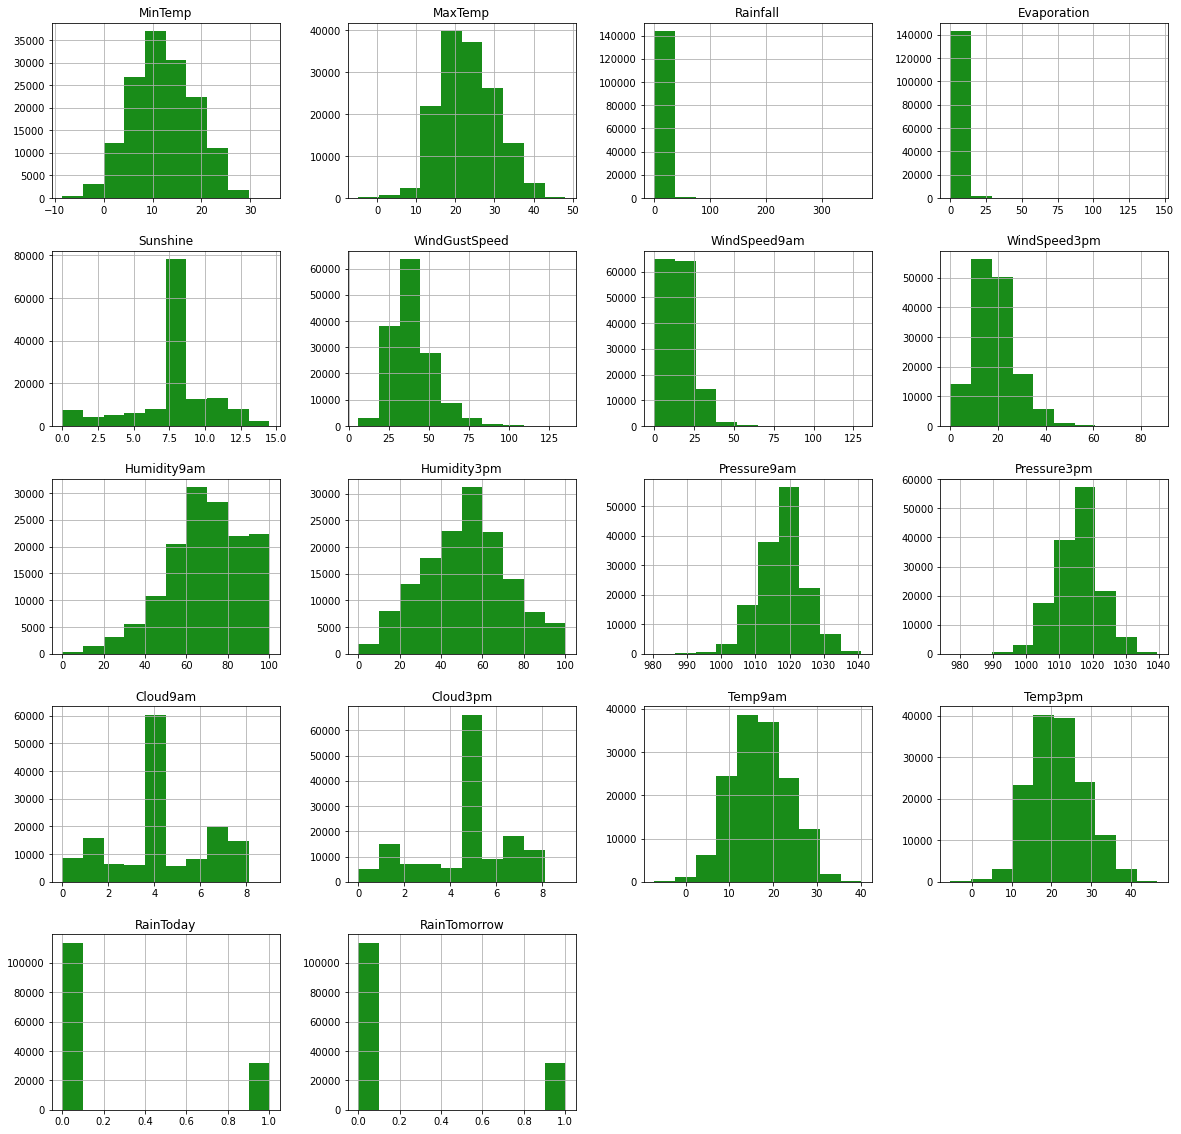

In [131]:
weather.hist(figsize=(20,20), color='g', alpha=0.9, histtype ='bar')

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

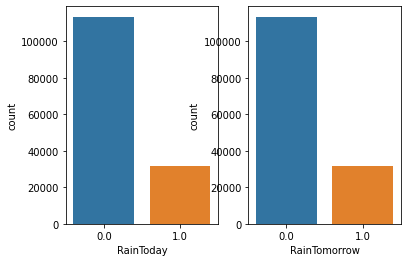

<Figure size 1440x1440 with 0 Axes>

In [82]:
fig,ax =plt.subplots(1,2)
plt.figure(figsize=(20,20))
sns.countplot(data=weather,x='RainToday',ax=ax[0])
sns.countplot(data=weather,x='RainTomorrow',ax=ax[1])

<AxesSubplot:>

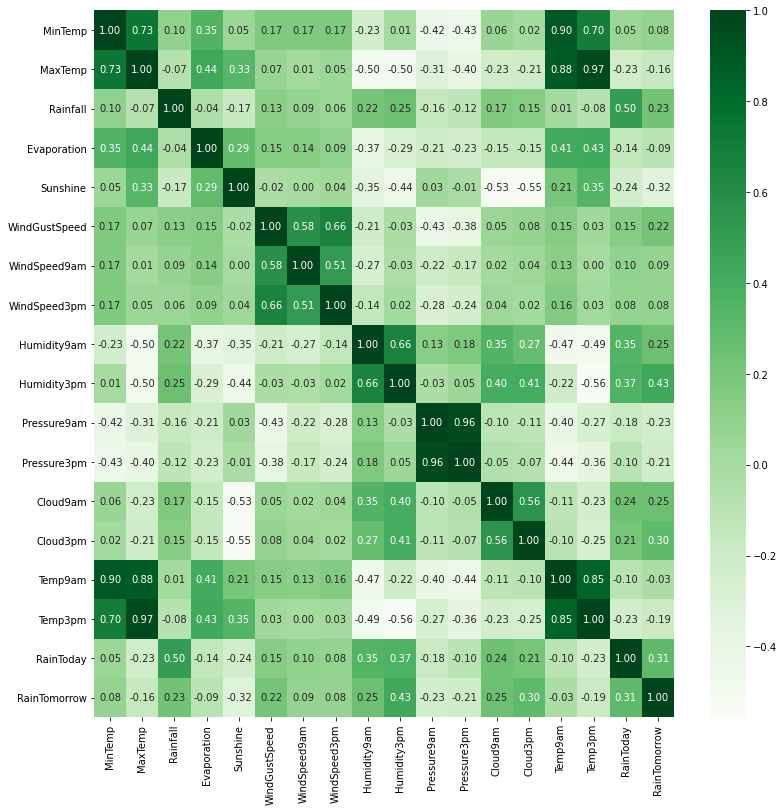

In [83]:
plt.figure(figsize=(13,13))
sns.heatmap(weather.corr(), cmap = 'Greens', annot=True, fmt=".2f")

In [ ]:
fig = plt.figure(figsize = (10,7))
plt.scatter(weather['Temp3pm'], weather['MaxTemp'], alpha = 0.1)

In [ ]:
fig = plt.figure(figsize = (10,7))
plt.scatter(weather['Pressure3pm'], weather['Pressure9am'], alpha = 0.1)

In [ ]:
weather = weather.drop(['Temp3pm'], axis = 1)
weather = weather.drop(['Pressure9am'], axis = 1)
weather = weather.drop(['Date'], axis = 1) #maybe?

# maybe drop more colls

In [ ]:

le = preprocessing.LabelEncoder()
weather['Location'] = le.fit_transform(weather['Location'])
weather['WindDir9am'] = le.fit_transform(weather['WindDir9am'])
weather['WindDir3pm'] = le.fit_transform(weather['WindDir3pm'])
weather['WindGustDir'] = le.fit_transform(weather['WindGustDir'])
weather.head(10)

In [ ]:
x = weather.drop(['RainTomorrow'], axis = 1)
y = weather['RainTomorrow']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)
# test size was 0.2

In [ ]:
z = X_train.values #returns a numpy array
min_max_scaler = MinMaxScaler()
z_scaled = min_max_scaler.fit_transform(z)
X_train = pd.DataFrame(z_scaled)

z = X_test.values #returns a numpy array
z_scaled = min_max_scaler.fit_transform(z)
X_test = pd.DataFrame(z_scaled)
X_train.head()
# X_test.head()

In [ ]:
dummyModel = DummyClassifier(strategy="stratified")
dummyModel.fit(X_train, y_train)
predictionsDummy = dummyModel.predict(X_test)

accuracyDummy = metrics.accuracy_score(y_test, predictionsDummy)
accuracyDummy

In [ ]:
modelLogReg = LogisticRegression(max_iter=500)
modelLogReg.fit(X_train, y_train)
predictionsLogReg = modelLogReg.predict(X_test)
accuracyLogReg = modelLogReg.score(X_test, y_test)

conf = confusion_matrix(y_test, predictionsLogReg)
print ("The accuracy of Logistic Regression is : ", accuracyLogReg*100, "%")
print(accuracyLogReg)
# print("F1 score for logistic regression is :",f1_score(y_test, predictionsLogReg,)*100, "%")

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsLogReg), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
maxi = 1 #saving the index of the highest score
max = 0 #saving the value of the highest score
# for i in range(2,20):
#     accuracy = cross_val_score(modelLogReg, X_train, y_train, cv = i).mean()
#     if (accuracy > max):
#         maxi = i
#         max = accuracy
# print('Best index:', maxi, "\ncross_val_score of index", maxi, ':', max)

accuracy = cross_val_score(modelLogReg, X_train, y_train, cv = 11).mean()
maxi = 11
max = accuracy
print('Best index:', maxi, "\ncross_val_score of index", maxi, ':', max)


# print("Best index: 11 
# cross_val_score of index 11 : 0.8424691109678968")

In [ ]:
maxi = 1 #saving the index of the highest score
max = 0 #saving the value of the highest score
# for i in range(1,20):
#     modelKNN = KNeighborsClassifier(n_neighbors = i, weights='distance')
#     modelKNN.fit(X_train, y_train)
#     accuracy = modelKNN.score(X_test, y_test)
#     if (accuracy > max):
#         maxi = i
#         max = accuracy
# print(maxi, "  ", max)

modelKNN = KNeighborsClassifier(n_neighbors = 12, weights='distance')
modelKNN.fit(X_train, y_train)
accuracy = modelKNN.score(X_test, y_test)
print("12,",accuracy)

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors = 9, weights='distance')
modelKNN.fit(X_train, y_train)
predictionsKNN = modelKNN.predict(X_test)
accuracyKNN = metrics.accuracy_score(y_test, predictionsKNN) #Resturns the same value as the score() method in the
#previous cell
accuracyKNN

conf = confusion_matrix(y_test, predictionsKNN)
print ("The accuracy of Logistic Regression is : ", accuracyKNN*100, "%")
print(accuracyLogReg)
# print("F1 score for logistic regression is :",f1_score(y_test, predictionsKNN,)*100, "%")

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsKNN), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
maxi = 1 #saving the index of the highest score
max = 0 #saving the value of the highest score
# for i in range(2,20):
#     accuracy = cross_val_score(modelKNN, X_train, y_train, cv = i).mean()
#     if (accuracy > max):
#         maxi = i
#         max = accuracy
# print('Best index:', maxi, "\ncross_val_score of index", maxi, ':', max)

accuracy = cross_val_score(modelKNN, X_train, y_train, cv = 14).mean()
print("14,",accuracy)